In [1]:
# Intialization
import os
import sys

os.environ["SPARK_HOME"] = "/home/talentum/spark"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
# In below two lines, use /usr/bin/python2.7 if you want to use Python 2
os.environ["PYSPARK_PYTHON"] = "/usr/bin/python3.6" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/bin/python3"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")

# NOTE: Whichever package you want mention here.
# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.6.0 pyspark-shell' 
# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.apache.spark:spark-avro_2.11:2.4.0 pyspark-shell'
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.6.0,org.apache.spark:spark-avro_2.11:2.4.3 pyspark-shell'
# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.6.0,org.apache.spark:spark-avro_2.11:2.4.0 pyspark-shell'

In [2]:
#Entrypoint 2.x
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Spark SQL basic example").enableHiveSupport().getOrCreate()

# On yarn:
# spark = SparkSession.builder.appName("Spark SQL basic example").enableHiveSupport().master("yarn").getOrCreate()
# specify .master("yarn")

sc = spark.sparkContext

In [3]:
df = spark.read.parquet("file:///home/talentum/Airquality_forecast/imputed1.parquet")

# If you're on Windows, use the absolute path like this:
# df = spark.read.parquet("C:/Users/talentum/Airquality_forecast/imputed.parquet")

# Show the DataFrame
df.show()

+-------+-------------+---------------+--------------+--------+---------+---------+-------------+-------------------+--------------+------+-------+--------+-------------+-------------------+-----------+----------+--------+------+---------+-----------+-----+
|bp_mmhg|benzene_ug_m3|mp_xylene_ug_m3|o_xylene_ug_m3|co_mg_m3|nh3_ug_m3|so2_ug_m3|temp_degree_c|          from_date|         state|wd_deg|nox_ppb|no_ug_m3|toluene_ug_m3|            to_date|ozone_ug_m3|pm10_ug_m3|sr_w_mt2|ws_m_s|no2_ug_m3|pm2_5_ug_m3| rh_%|
+-------+-------------+---------------+--------------+--------+---------+---------+-------------+-------------------+--------------+------+-------+--------+-------------+-------------------+-----------+----------+--------+------+---------+-----------+-----+
|  218.5|          0.4|           2.19|          2.65|    0.26|     6.88|     3.28|         32.6|2016-07-06 00:00:00|Andhra Pradesh| 298.0|  15.08|     3.4|          3.7|2016-07-06 00:00:00|      13.78|      12.5|    10.0|  2.

In [4]:
df.printSchema()

root
 |-- bp_mmhg: double (nullable = true)
 |-- benzene_ug_m3: double (nullable = true)
 |-- mp_xylene_ug_m3: double (nullable = true)
 |-- o_xylene_ug_m3: double (nullable = true)
 |-- co_mg_m3: double (nullable = true)
 |-- nh3_ug_m3: double (nullable = true)
 |-- so2_ug_m3: double (nullable = true)
 |-- temp_degree_c: double (nullable = true)
 |-- from_date: timestamp (nullable = true)
 |-- state: string (nullable = true)
 |-- wd_deg: double (nullable = true)
 |-- nox_ppb: double (nullable = true)
 |-- no_ug_m3: double (nullable = true)
 |-- toluene_ug_m3: double (nullable = true)
 |-- to_date: timestamp (nullable = true)
 |-- ozone_ug_m3: double (nullable = true)
 |-- pm10_ug_m3: double (nullable = true)
 |-- sr_w_mt2: double (nullable = true)
 |-- ws_m_s: double (nullable = true)
 |-- no2_ug_m3: double (nullable = true)
 |-- pm2_5_ug_m3: double (nullable = true)
 |-- rh_%: double (nullable = true)



In [5]:
df.select("From_date").show(5)


+-------------------+
|          From_date|
+-------------------+
|2016-07-06 00:00:00|
|2016-07-16 00:00:00|
|2016-07-29 00:00:00|
|2016-08-12 00:00:00|
|2016-08-13 00:00:00|
+-------------------+
only showing top 5 rows



In [6]:
from pyspark.sql.functions import year, month, dayofmonth

df = df.withColumn("From_year", year(df["From_date"]))
df = df.withColumn("From_month", month(df["From_date"]))
df = df.withColumn("From_day", dayofmonth(df["From_date"]))

df = df.withColumn("To_year", year(df["To_date"]))
df = df.withColumn("To_month", month(df["To_date"]))
df = df.withColumn("To_day", dayofmonth(df["To_date"]))


In [10]:
from pyspark.sql.functions import col

# List of numeric columns
numeric_columns = [col for col, dtype in df.dtypes if dtype == 'double']

# Initialize an empty dictionary to hold correlation values
correlation_matrix = {}

# Compute pairwise correlation
for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        col1 = numeric_columns[i]
        col2 = numeric_columns[j]
        corr_value = df.stat.corr(col1, col2)
        correlation_matrix[(col1, col2)] = corr_value

# Display the correlation matrix
for (col1, col2), corr_value in correlation_matrix.items():
    print(f"Correlation between {col1} and {col2}: {corr_value}")


Correlation between bp_mmhg and benzene_ug_m3: -0.09451773974251916
Correlation between bp_mmhg and mp_xylene_ug_m3: -0.19049123222158768
Correlation between bp_mmhg and o_xylene_ug_m3: 0.24442467845497215
Correlation between bp_mmhg and co_mg_m3: -0.176983104836429
Correlation between bp_mmhg and nh3_ug_m3: 0.029913981832247378
Correlation between bp_mmhg and so2_ug_m3: -0.05566918417350832
Correlation between bp_mmhg and temp_degree_c: -0.15101095277257584
Correlation between bp_mmhg and wd_deg: 0.11458887641897483
Correlation between bp_mmhg and nox_ppb: -0.10079137968340107
Correlation between bp_mmhg and no_ug_m3: -0.1899565069945583
Correlation between bp_mmhg and toluene_ug_m3: -0.08411271806651058
Correlation between bp_mmhg and ozone_ug_m3: 0.08327080538180884
Correlation between bp_mmhg and pm10_ug_m3: -0.05456911599882041
Correlation between bp_mmhg and sr_w_mt2: 0.14770494645372073
Correlation between bp_mmhg and ws_m_s: -0.2728490672261869
Correlation between bp_mmhg and n

In [11]:
import pandas as pd

# Initialize an empty DataFrame for the correlation matrix
corr_df = pd.DataFrame(index=numeric_columns, columns=numeric_columns)

# Populate the DataFrame with correlation values
for (col1, col2), corr_value in correlation_matrix.items():
    corr_df.loc[col1, col2] = corr_value
    corr_df.loc[col2, col1] = corr_value

# Since diagonal elements (self-correlation) are not included, fill them with 1
for col in numeric_columns:
    corr_df.loc[col, col] = 1.0

# Convert the DataFrame to float (optional, ensures correct dtype)
corr_df = corr_df.astype(float)

# Display the correlation matrix
print(corr_df)


                  bp_mmhg  benzene_ug_m3  mp_xylene_ug_m3  o_xylene_ug_m3  \
bp_mmhg          1.000000      -0.094518        -0.190491        0.244425   
benzene_ug_m3   -0.094518       1.000000        -0.045834       -0.142779   
mp_xylene_ug_m3 -0.190491      -0.045834         1.000000       -0.148066   
o_xylene_ug_m3   0.244425      -0.142779        -0.148066        1.000000   
co_mg_m3        -0.176983       0.069289        -0.147471       -0.166797   
nh3_ug_m3        0.029914      -0.011050         0.307493       -0.078759   
so2_ug_m3       -0.055669       0.073966        -0.032796       -0.156106   
temp_degree_c   -0.151011      -0.103968         0.572498       -0.071762   
wd_deg           0.114589      -0.123558        -0.126649        0.307486   
nox_ppb         -0.100791       0.089711         0.196114       -0.129144   
no_ug_m3        -0.189957      -0.094892        -0.108904       -0.166689   
toluene_ug_m3   -0.084113      -0.104181         0.278412       -0.017302   

In [13]:
!pip install seaborn


Traceback (most recent call last):
  File "/home/talentum/miniconda3/bin/pip", line 4, in <module>
    import re
  File "/usr/lib/python3.6/re.py", line 123, in <module>
    import sre_compile
  File "/usr/lib/python3.6/sre_compile.py", line 17, in <module>
    assert _sre.MAGIC == MAGIC, "SRE module mismatch"
AssertionError: SRE module mismatch


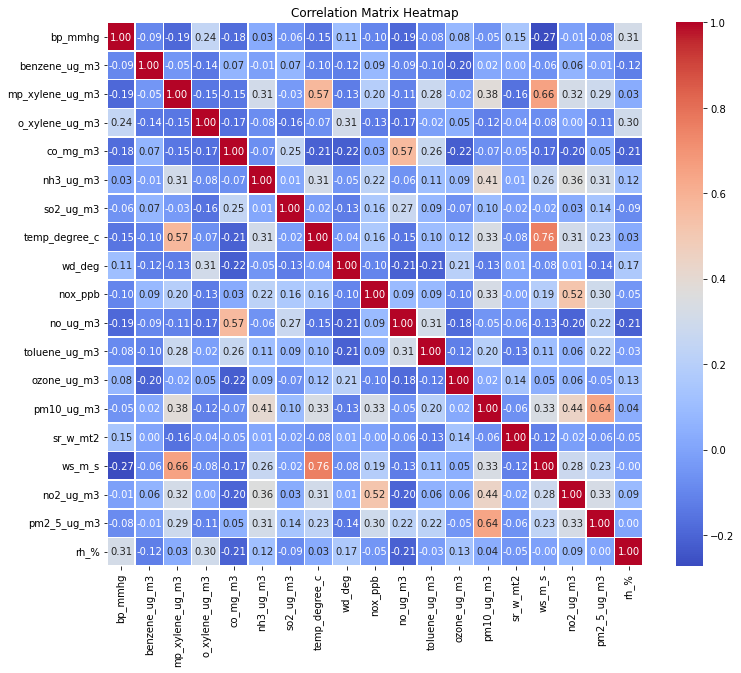

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(12, 10))

# Create the heatmap using seaborn
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set titles and labels
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
# Convert to Pandas DataFrame for visualization
#pandas_df = df.select(numeric_columns).toPandas()

In [ ]:
import pandas as pd

# Assuming df is your Spark DataFrame
# Create a list of column names
numeric_columns = [col for col, dtype in df.dtypes if dtype == 'double']

# Initialize an empty dictionary to hold correlation values
correlation_matrix = {}

# Compute pairwise correlation
for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        col1 = numeric_columns[i]
        col2 = numeric_columns[j]
        corr_value = df.stat.corr(col1, col2)
        correlation_matrix[(col1, col2)] = corr_value

# Convert the dictionary to a pandas DataFrame
corr_df = pd.DataFrame.from_dict(correlation_matrix, orient='index', columns=['Correlation'])
corr_df = corr_df.reset_index()
corr_df[['col1', 'col2']] = pd.DataFrame(corr_df['index'].tolist(), index=corr_df.index)
corr_df = corr_df.drop(columns=['index'])
corr_df_pivot = corr_df.pivot(index='col1', columns='col2', values='Correlation')

# Display the first few rows of the DataFrame to verify
print(corr_df_pivot.head())


In [ ]:
import pyspark
print(pyspark.__version__)


In [ ]:
java -version


In [7]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer

# Assuming your Spark session is already initialized and df is loaded
#df = spark.read.parquet("file:///home/talentum/Airquality_forecast/imputed1.parquet")

# Display the DataFrame (optional)
#df.show()

# Feature columns to be used
feature_columns = [
    'bp_mmhg', 'benzene_ug_m3', 'mp_xylene_ug_m3', 'o_xylene_ug_m3',
    'co_mg_m3', 'nh3_ug_m3', 'so2_ug_m3', 'temp_degree_c', 'wd_deg', 
    'nox_ppb', 'no_ug_m3', 'toluene_ug_m3', 'ozone_ug_m3', 'pm10_ug_m3', 
    'sr_w_mt2', 'ws_m_s', 'no2_ug_m3', 'pm2_5_ug_m3', 'rh_%'
]

# Assemble the features into a single vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Index the target column (if categorical)
label_indexer = StringIndexer(inputCol="state", outputCol="label").fit(df)

# Transform the DataFrame with the assembler and indexer
df_prepared = assembler.transform(df)
df_prepared = label_indexer.transform(df_prepared)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=100)

# Train the model
model = rf.fit(df_prepared)

# Extract and print feature importance
feature_importances = model.featureImportances

print("Feature Importances:")
for feature, importance in zip(feature_columns, feature_importances):
    print(f"{feature}: {importance:.4f}")


Feature Importances:
bp_mmhg: 0.1221
benzene_ug_m3: 0.0645
mp_xylene_ug_m3: 0.1320
o_xylene_ug_m3: 0.1549
co_mg_m3: 0.0151
nh3_ug_m3: 0.0198
so2_ug_m3: 0.0005
temp_degree_c: 0.1646
wd_deg: 0.0588
nox_ppb: 0.0001
no_ug_m3: 0.0370
toluene_ug_m3: 0.0366
ozone_ug_m3: 0.0342
pm10_ug_m3: 0.0095
sr_w_mt2: 0.0364
ws_m_s: 0.1015
no2_ug_m3: 0.0014
pm2_5_ug_m3: 0.0003
rh_%: 0.0107


In [8]:
import pandas as pd

# Convert feature importances to a list
feature_importance_list = [(feature, importance) for feature, importance in zip(feature_columns, feature_importances)]

# Create a pandas DataFrame
df_importances = pd.DataFrame(feature_importance_list, columns=['Feature', 'Importance'])

# Sort the DataFrame by importance
df_importances = df_importances.sort_values(by='Importance', ascending=False)


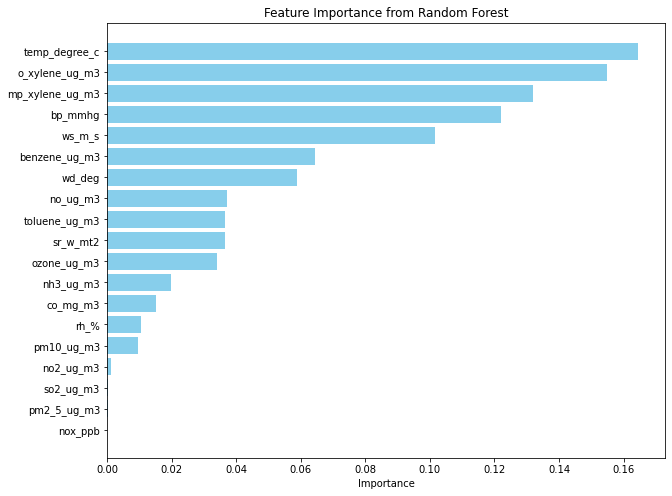

In [18]:
import matplotlib.pyplot as plt

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(df_importances['Feature'], df_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features on top
plt.show()


### Moving with the Arima Part From here 


In [15]:
from pyspark.sql.functions import avg, col

# List of numeric columns
numeric_columns = [col_name for col_name, dtype in df.dtypes if dtype == 'double']

# Create aggregation expressions for each numeric column
agg_expressions = [avg(col(column)).alias(column) for column in numeric_columns]

# Aggregate data by timestamp (e.g., taking the average for each timestamp)
df_aggregated = df.groupBy("from_date").agg(*agg_expressions)

# Show the aggregated DataFrame
df_aggregated.show()


+-------------------+------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|          from_date|           bp_mmhg|      benzene_ug_m3|   mp_xylene_ug_m3|    o_xylene_ug_m3|           co_mg_m3|         nh3_ug_m3|         so2_ug_m3|     temp_degree_c|            wd_deg|           nox_ppb|          no_ug_m3|     toluene_ug_m3|       ozone_ug_m3|        pm10_ug_m3|          sr_w_mt2|            ws_m_s|         no2_ug_m3|       pm2_5_ug_m3|              rh_%|
+-------------------+------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-----------------

In [16]:
# Convert to Pandas DataFrame
pandas_df = df_aggregated.toPandas()

In [17]:
pandas_df['from_date'] = pd.to_datetime(pandas_df['from_date'])
pandas_df.set_index('from_date', inplace=True)